In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, chi2_contingency
from scipy.stats import ttest_ind, pearsonr

In [35]:
data = pd.read_csv('Users.csv')

In [36]:
# Removing "data/" prefix from column names if it exists
data.columns = data.columns.str.replace('data/', '')

# Drop columns that contain "address" in their name
data = data.loc[:, ~data.columns.str.contains('address', case=False)]

In [37]:
data.head()

,fid_active_tier_name,fid_active_tier,fid_active_tier_last,fid,fname,account_age,channels,top_channels/0,top_channels/1,top_channels/2,...,wow_engage,total_transactions,trading_volume_usd,contracts_deployed,got_likes,wow_likes,got_recasts,wow_recasts,got_replies,wow_replies
0,vip,4,4,3,dwr.eth,334,72.0,farcaster,food,memes,...,10138.607958,1249,849807.444406,204,23579,4590,2777,464,7279,3382
1,vip,4,4,347,greg,334,24.0,dev,ens,fc-devs,...,-617.595415,825,79276.446527,22,2230,-564,248,-61,386,33
2,vip,4,4,99,jessepollak,334,34.0,base,base-builds,onchainsummer,...,-1744.262819,3141,632996.086351,47,11715,-686,1776,-140,1734,84
3,vip,4,4,8,jacob,334,17.0,zora,founders,six,...,-4481.875335,5116,786203.713226,143,3463,-1892,368,-271,431,-269
4,active,1,2,207,tim,334,1.0,ethereum,NaN,NaN,...,-829.534114,723,253989.713865,9,697,-301,128,-52,43,-43


In [38]:
numerical_columns = ['account_age', 'total_transactions', 
                     'trading_volume_usd', 'contracts_deployed', 'followers', 'got_likes','wow_likes', 'got_recasts','wow_recasts','got_replies','wow_replies' ]

In [39]:
data1 = data[numerical_columns]

## <font color='Blue'> Exploratory Data Analysis </font>

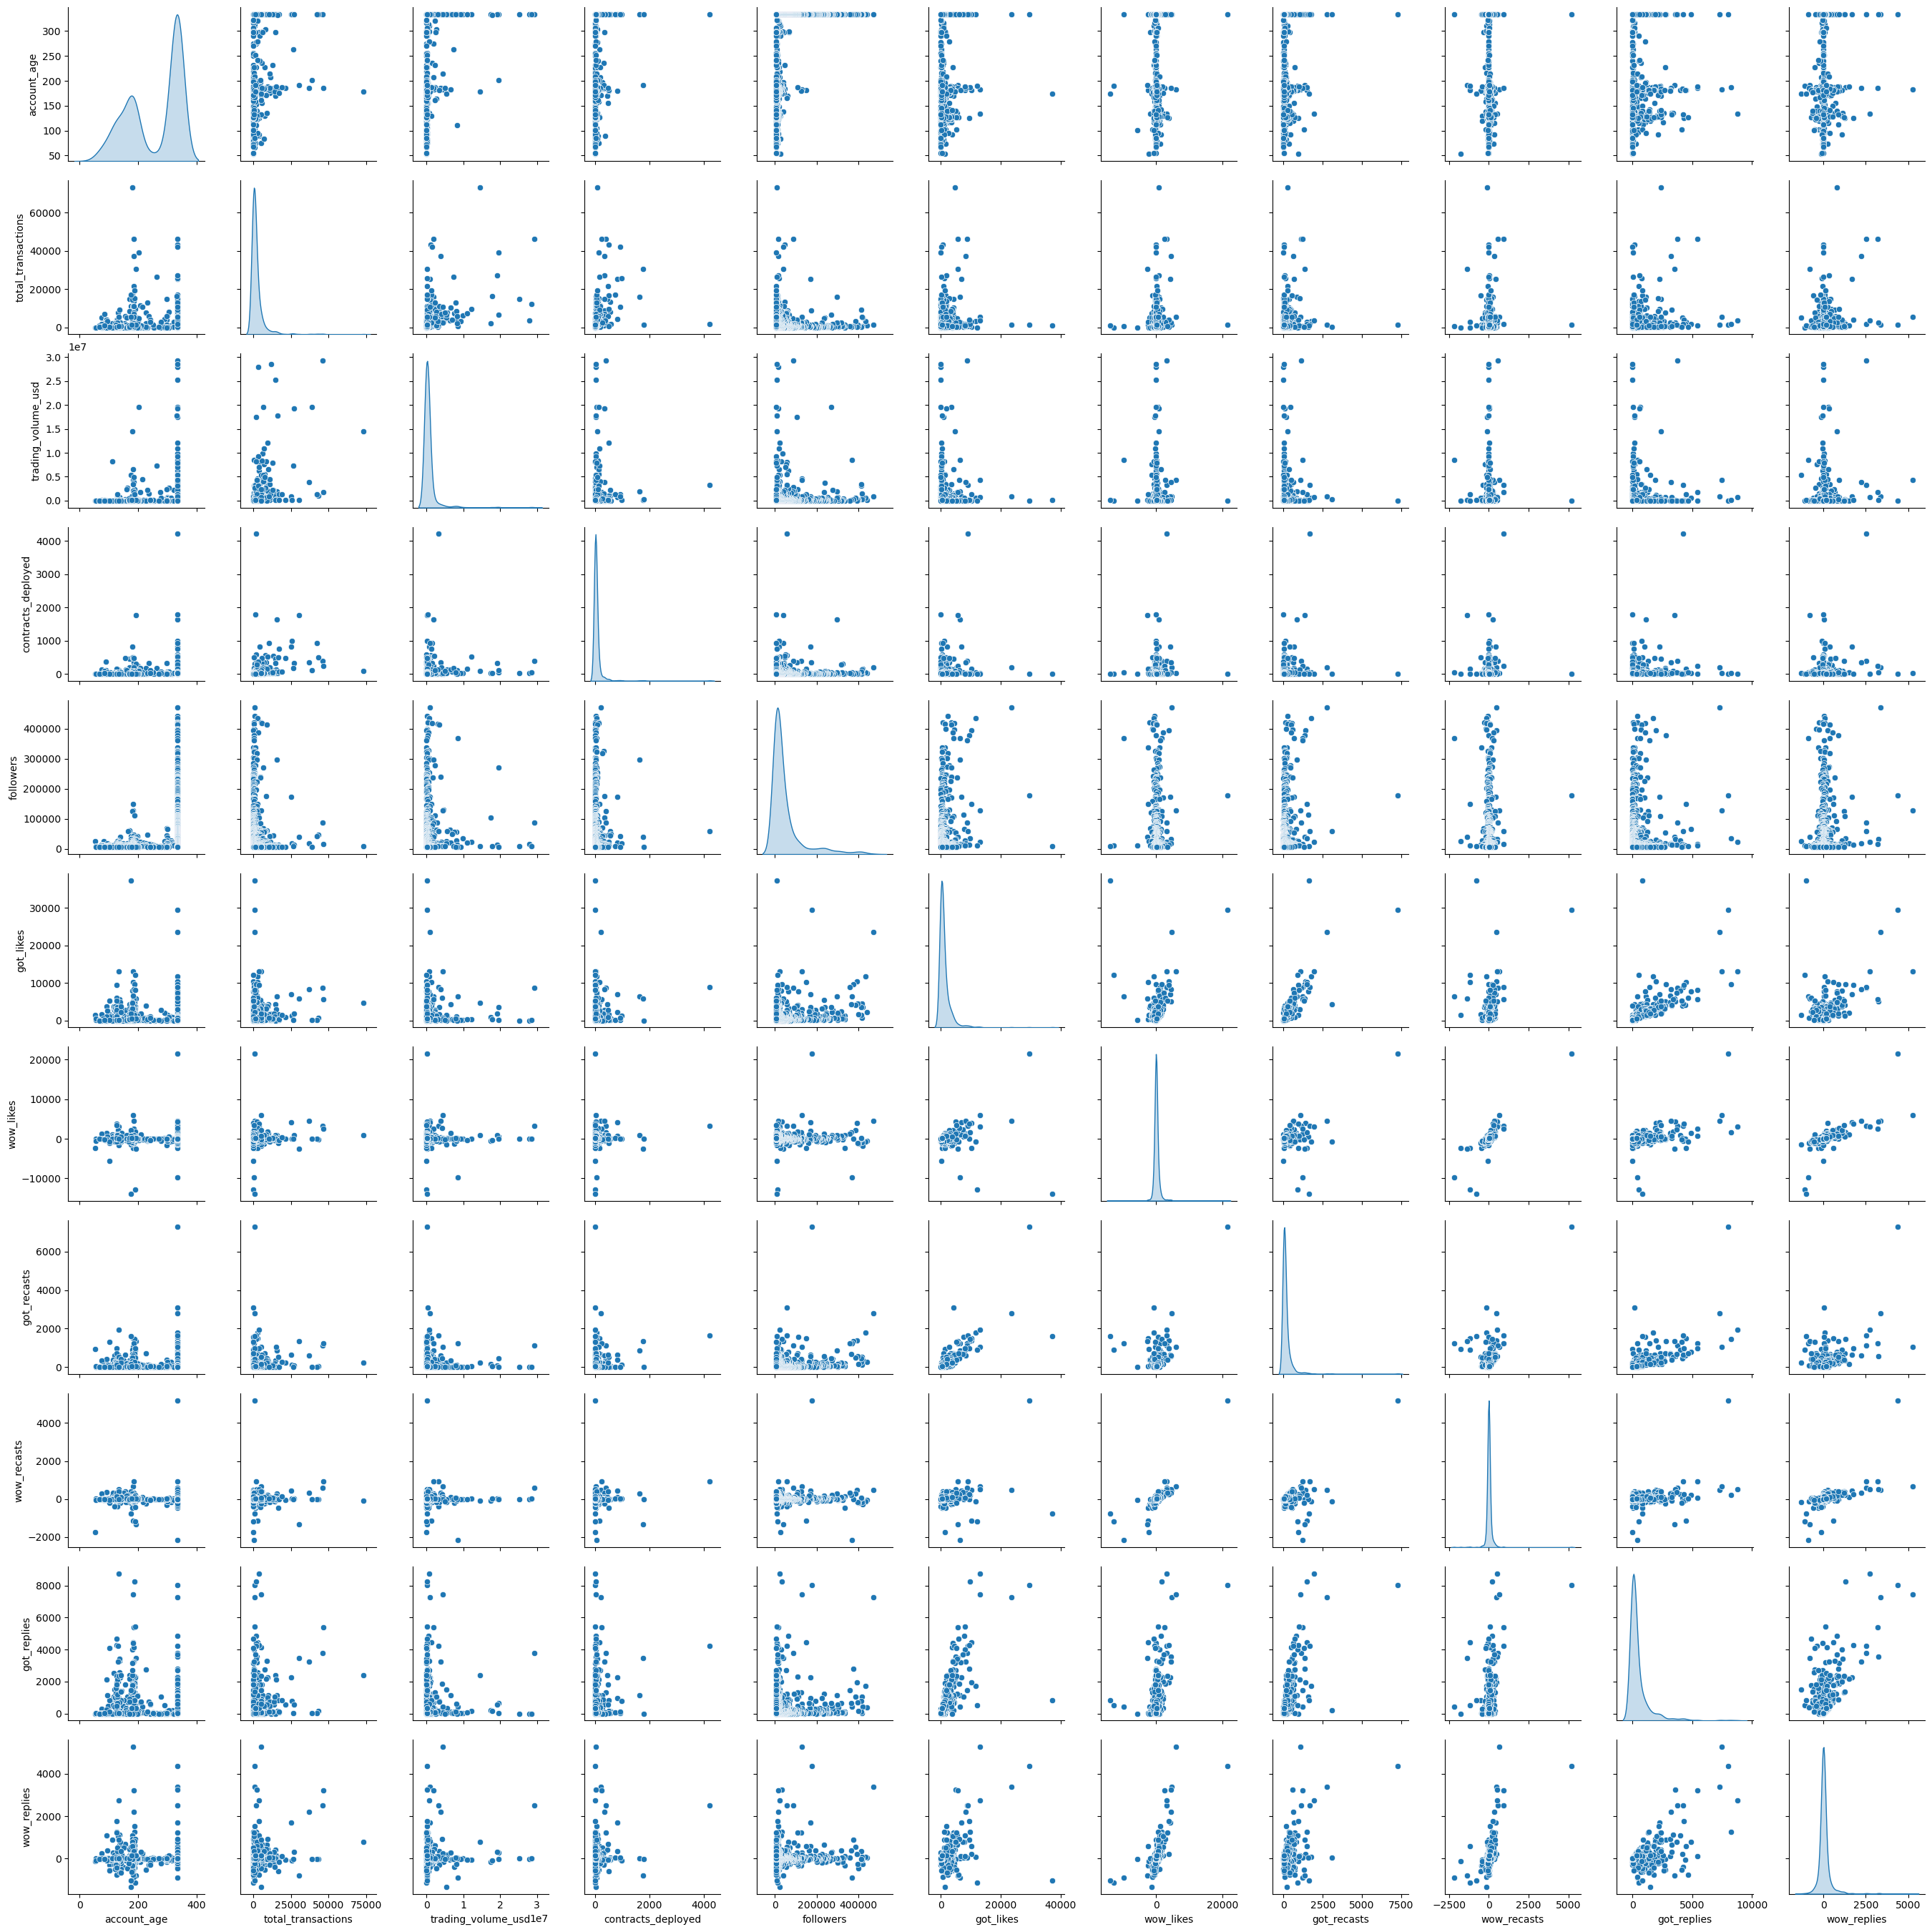

In [40]:
# Plotting Relationships for Numerical Columns

sns.pairplot(data[['account_age', 'total_transactions', 
                     'trading_volume_usd', 'contracts_deployed', 'followers', 'got_likes','wow_likes', 'got_recasts','wow_recasts','got_replies','wow_replies' ]], diag_kind='kde')
plt.show()

## <font color='Blue'>Hypothesis Testing</font>

### Hypothesis 1. If followers are more then wow_likes are less.

In [41]:
followers_likes_corr, _ = pearsonr(data['followers'], data['wow_likes'])
print(f"Correlation between followers and wow_likes: {followers_likes_corr:.2f}")
if followers_likes_corr < 0:
    print("Hypothesis 1 supported: More followers, fewer wow_likes.")
else:
    print("Hypothesis 1 not supported.")

Correlation between followers and wow_likes: 0.04
Hypothesis 1 not supported.


### Hypothesis 2. If followers are more, wow_replies are less.

In [42]:
followers_replies_corr, _ = pearsonr(data['followers'], data['wow_replies'])
print(f"Correlation between followers and wow_replies: {followers_replies_corr:.2f}")
if followers_replies_corr < 0:
    print("Hypothesis 2 supported: More followers, fewer wow_replies.")
else:
    print("Hypothesis 2 not supported.")

Correlation between followers and wow_replies: 0.11
Hypothesis 2 not supported.


### Hypothesis 3. If followers are more, wow_recasts are less.

In [43]:
followers_recasts_corr, _ = pearsonr(data['followers'], data['wow_recasts'])
print(f"Correlation between followers and wow_recasts: {followers_recasts_corr:.2f}")
if followers_recasts_corr < 0:
    print("Hypothesis 3 supported: More followers, fewer wow_recasts.")
else:
    print("Hypothesis 3 not supported.")

Correlation between followers and wow_recasts: 0.01
Hypothesis 3 not supported.


### Hypothesis 4. If account_age is more, total_transactions is more.

In [44]:
age_transactions_corr, _ = pearsonr(data['account_age'], data['total_transactions'])
print(f"Correlation between account_age and total_transactions: {age_transactions_corr:.2f}")
if age_transactions_corr > 0:
    print("Hypothesis 4 supported: Older accounts have more total transactions.")
else:
    print("Hypothesis 4 not supported.")

Correlation between account_age and total_transactions: 0.04
Hypothesis 4 supported: Older accounts have more total transactions.


### Hypothesis 5. If account_age is more, trading_volume_usd is more.

In [45]:
age_volume_corr, _ = pearsonr(data['account_age'], data['trading_volume_usd'])
print(f"Correlation between account_age and trading_volume_usd: {age_volume_corr:.2f}")
if age_volume_corr > 0:
    print("Hypothesis 5 supported: Older accounts have higher trading volume.")
else:
    print("Hypothesis 5 not supported.")

Correlation between account_age and trading_volume_usd: 0.14
Hypothesis 5 supported: Older accounts have higher trading volume.


### Hypothesis 6. If account_age is more, contracts_deployed is more.

In [46]:
age_contracts_corr, _ = pearsonr(data['account_age'], data['contracts_deployed'])
print(f"Correlation between account_age and contracts_deployed: {age_contracts_corr:.2f}")
if age_contracts_corr > 0:
    print("Hypothesis 6 supported: Older accounts have more contracts deployed.")
else:
    print("Hypothesis 6 not supported.")

Correlation between account_age and contracts_deployed: 0.10
Hypothesis 6 supported: Older accounts have more contracts deployed.


### Hypothesis 7. How active_tier_name correlates to total_transactions, trading_volume_usd, contracts_deployed

In [47]:
tier_transactions_corr, _ = pearsonr(data['fid_active_tier'], data['total_transactions'])
tier_volume_corr, _ = pearsonr(data['fid_active_tier'], data['trading_volume_usd'])
tier_contracts_corr, _ = pearsonr(data['fid_active_tier'], data['contracts_deployed'])

print(f"Correlation between active_tier_name and total_transactions: {tier_transactions_corr:.2f}")
print(f"Correlation between active_tier_name and trading_volume_usd: {tier_volume_corr:.2f}")
print(f"Correlation between active_tier_name and contracts_deployed: {tier_contracts_corr:.2f}")


Correlation between active_tier_name and total_transactions: 0.14
Correlation between active_tier_name and trading_volume_usd: 0.03
Correlation between active_tier_name and contracts_deployed: 0.15


### Hypothesis 8. If followers are more, total_transactions is more.

In [48]:
followers_transactions_corr, _ = pearsonr(data['followers'], data['total_transactions'])
print(f"Correlation between followers and total_transactions: {followers_transactions_corr:.2f}")
if followers_transactions_corr > 0:
    print("Hypothesis 8 supported: More followers, more total transactions.")
else:
    print("Hypothesis 8 not supported.")

Correlation between followers and total_transactions: -0.05
Hypothesis 8 not supported.


### Hypothesis 9. If followers are more, trading_volume_usd is more.

In [49]:
followers_volume_corr, _ = pearsonr(data['followers'], data['trading_volume_usd'])
print(f"Correlation between followers and trading_volume_usd: {followers_volume_corr:.2f}")
if followers_volume_corr > 0:
    print("Hypothesis 9 supported: More followers, higher trading volume.")
else:
    print("Hypothesis 9 not supported.")

Correlation between followers and trading_volume_usd: 0.03
Hypothesis 9 supported: More followers, higher trading volume.


### Hypothesis 10. If followers are more, contracts_deployed is more.

In [50]:
followers_contracts_corr, _ = pearsonr(data['followers'], data['contracts_deployed'])
print(f"Correlation between followers and contracts_deployed: {followers_contracts_corr:.2f}")
if followers_contracts_corr > 0:
    print("Hypothesis 10 supported: More followers, more contracts deployed.")
else:
    print("Hypothesis 10 not supported.")

Correlation between followers and contracts_deployed: 0.02
Hypothesis 10 supported: More followers, more contracts deployed.
